In [130]:
#Loading libraries
import pandas as pd          
import numpy as np         
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series        
%matplotlib inline
import warnings                   
warnings.filterwarnings("ignore")
import seaborn as sns

In [131]:
import os

In [132]:
os.chdir("/Users/abhishekvigg/Documents/Time Series Project")
os.getcwd()

'/Users/abhishekvigg/Documents/Time Series Project'

In [133]:
#Importing data
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [134]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [135]:
train_original = train.copy()
test_original = test.copy()

In [136]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [137]:
train["Datetime"] = pd.to_datetime(train["Datetime"],format = "%d-%m-%Y %H:%M")
train_original["Datetime"] = pd.to_datetime(train_original["Datetime"],format = "%d-%m-%Y %H:%M")
test["Datetime"] = pd.to_datetime(test["Datetime"],format = "%d-%m-%Y %H:%M")
test_original["Datetime"] = pd.to_datetime(test["Datetime"],format = "%d-%m-%Y %H:%M")

In [138]:
train.index = train["Datetime"]
train = train.drop("ID",1)

In [139]:
ts = train["Count"]

Text(0.5,1,'Time Series Plot')

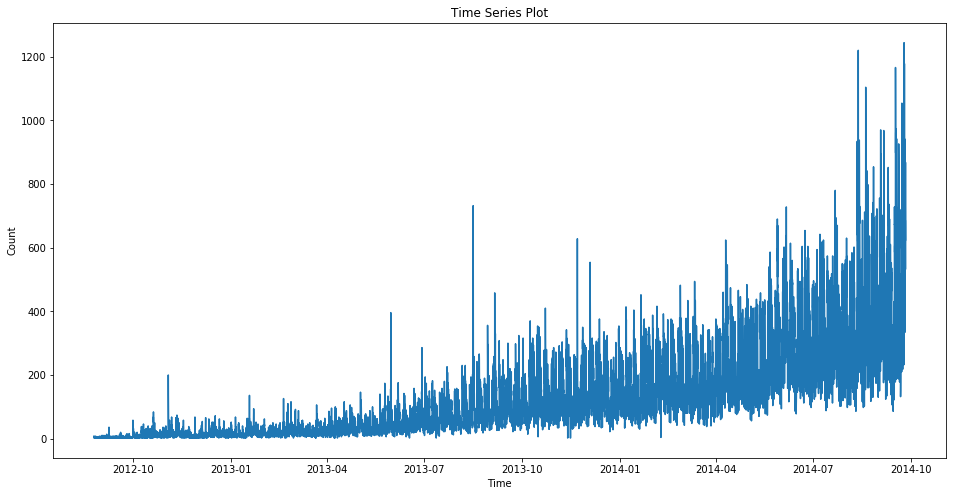

In [140]:
plt.figure(figsize=(16,8))
plt.plot(ts)
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Time Series Plot")
#Data Has an upward trend with increasing variance with time

In [141]:
train["Year"] = train["Datetime"].dt.year
train["Month"] = train["Datetime"].dt.month
train["Day"] = train["Datetime"].dt.day
train["Hour"] = train["Datetime"].dt.hour

In [142]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [143]:
train = train[["Year","Month","Day","Hour","Count"]]

In [144]:
train.head()

,Year,Month,Day,Hour,Count
Datetime,,,,,
2012-08-25 00:00:00,2012,8,25,0,8
2012-08-25 01:00:00,2012,8,25,1,2
2012-08-25 02:00:00,2012,8,25,2,6
2012-08-25 03:00:00,2012,8,25,3,2
2012-08-25 04:00:00,2012,8,25,4,2


In [145]:
#Hypothesis: The yearly traffic(Count) will increase
train_yearly = train.groupby("Year").Count.sum()

In [146]:
train_yearly

Year
2012      34932
2013     685968
2014    1820366
Name: Count, dtype: int64

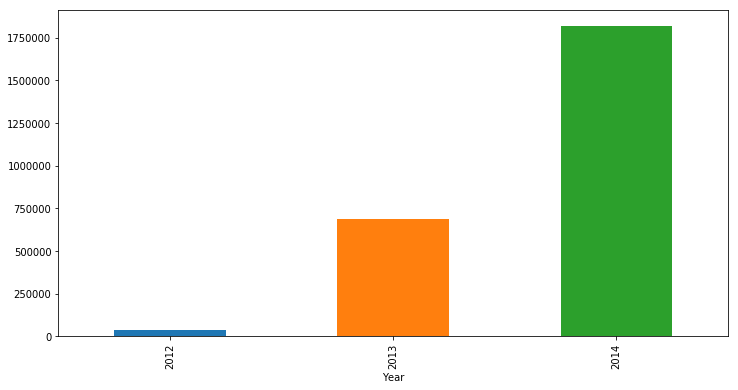

In [147]:
plt.figure(figsize=(12,6))
train_yearly.plot.bar()
#Hypothesis is true

In [148]:
#Checking for seasonality in the data
monthly_data = train.groupby(["Year","Month"]).Count.sum()

Text(0,0.5,'Sum Of Monthly Traffic')

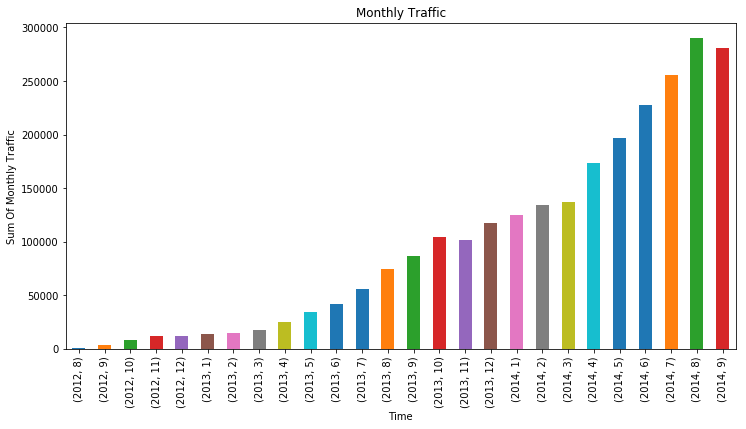

In [149]:
plt.figure(figsize=(12,6))
monthly_data.plot.bar()
plt.xlabel("Time")
plt.title("Monthly Traffic")
plt.ylabel("Sum Of Monthly Traffic")
#Seasonality Is Present where the end of the year always has more traffic

In [150]:
#Sampling Hourly Data
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

In [151]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

In [152]:
# Converting to daily mean
test = test.resample('D').mean()

In [153]:
# Converting to daily mean
train = train.resample('D').mean()

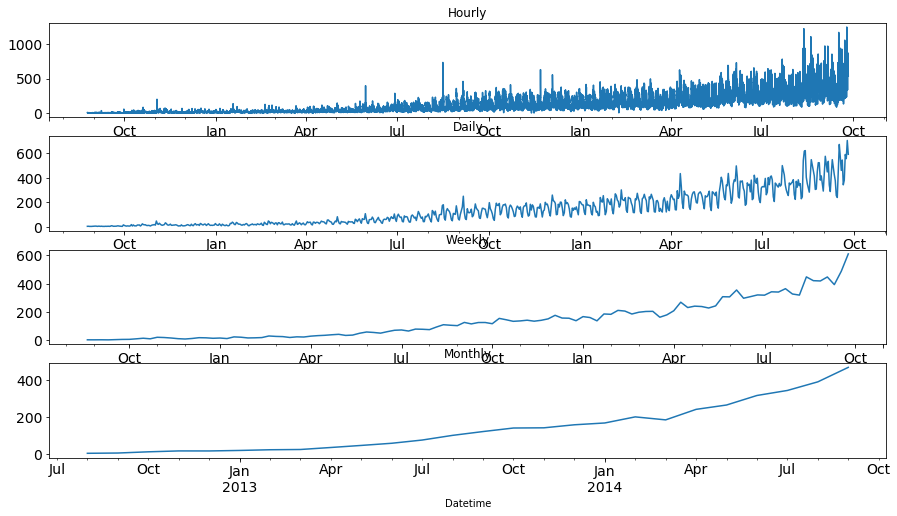

In [154]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [155]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

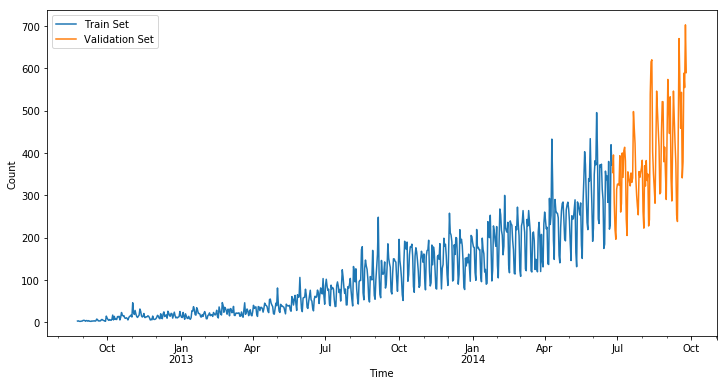

In [156]:
#Plotting Train and Validation Data
plt.figure(figsize=(12,6))
Train.Count.plot(label = "Train Set")
valid.Count.plot(label = "Validation Set")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend(loc = "best")

In [157]:
#Aplying Naive Model To The Train Data
dd = np.asarray(Train.Count)

In [158]:
y_hat = valid.copy()

In [159]:
y_hat.head()

,Year,Month,Day,Hour,Count
Datetime,,,,,
2014-06-25,2014.0,6.0,25.0,11.5,353.666667
2014-06-26,2014.0,6.0,26.0,11.5,395.250000
2014-06-27,2014.0,6.0,27.0,11.5,282.333333
2014-06-28,2014.0,6.0,28.0,11.5,218.250000
2014-06-29,2014.0,6.0,29.0,11.5,196.250000


In [160]:
y_hat["Naive"] = dd[len(dd)-1]

Text(0,0.5,'Count')

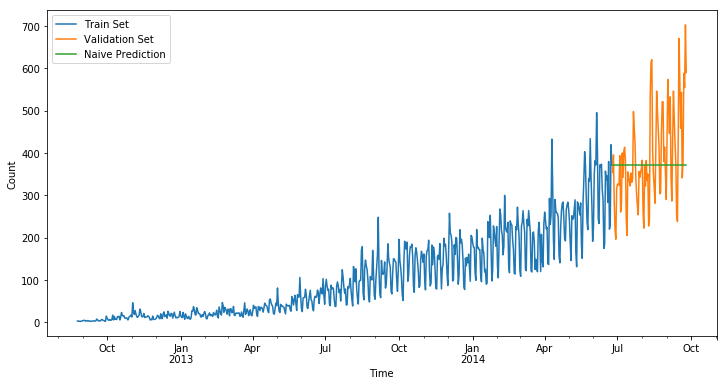

In [161]:
plt.figure(figsize=(12,6))
Train.Count.plot(label = "Train Set")
valid.Count.plot(label = "Validation Set")
y_hat.Naive.plot(label = "Naive Prediction")
plt.legend(loc = "best")
plt.xlabel("Time")
plt.ylabel("Count")

In [162]:
#Calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

In [163]:
naive_RMSE = sqrt(mean_squared_error(valid.Count,y_hat.Naive))
naive_RMSE

111.79050467496724

In [164]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [165]:
y_hat_avg = valid.copy()

In [166]:
fit2 = SimpleExpSmoothing(np.asarray(Train["Count"])).fit(smoothing_level = 0.6,optimized = False)

In [167]:
y_hat_avg["SES"] = fit2.forecast(len(valid))

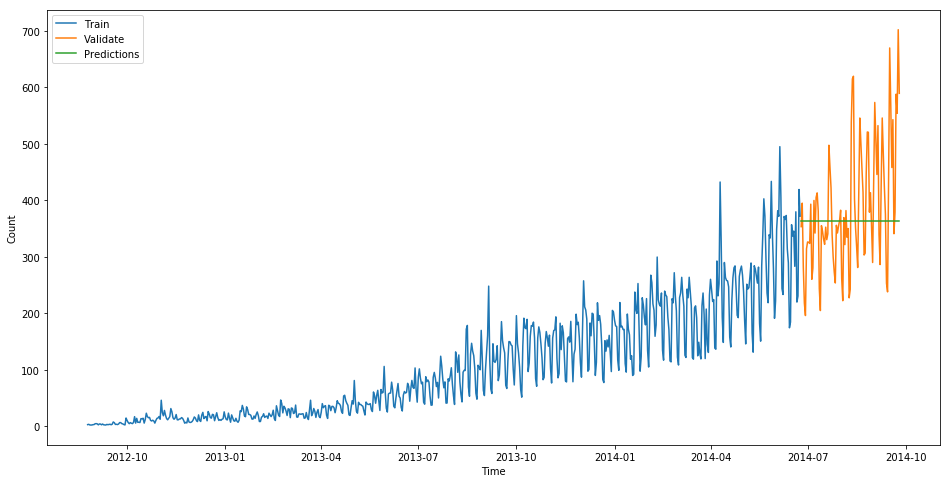

In [168]:
plt.figure(figsize=(16,8))
plt.plot(Train["Count"],label = "Train")
plt.plot(valid["Count"],label = "Validate")
plt.plot(y_hat_avg["SES"],label = "Predictions")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend(loc = "best")

In [169]:
rmse_ses = sqrt(mean_squared_error(valid["Count"],y_hat_avg["SES"]))
rmse_ses
#Not a good model as it does not capture sesonality and trend

113.43708111884514

In [170]:
#Making Holt's Linear Trend Model
import statsmodels.api as sm

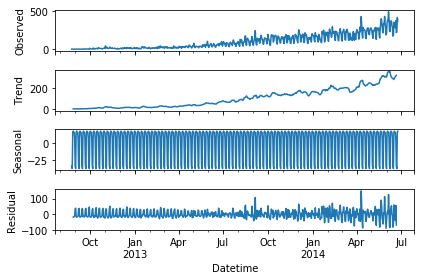

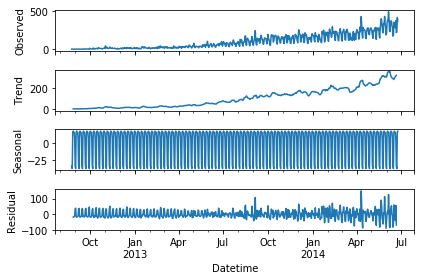

In [171]:
#Decomposing the trends and seasonality
sm.tsa.seasonal_decompose(Train.Count).plot()

In [172]:
y_hat_avg = valid.copy()

In [173]:
fit3 = Holt(np.asarray(Train["Count"])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)

In [174]:
y_hat_avg["Holt_Predictions"] = fit3.forecast(len(valid))

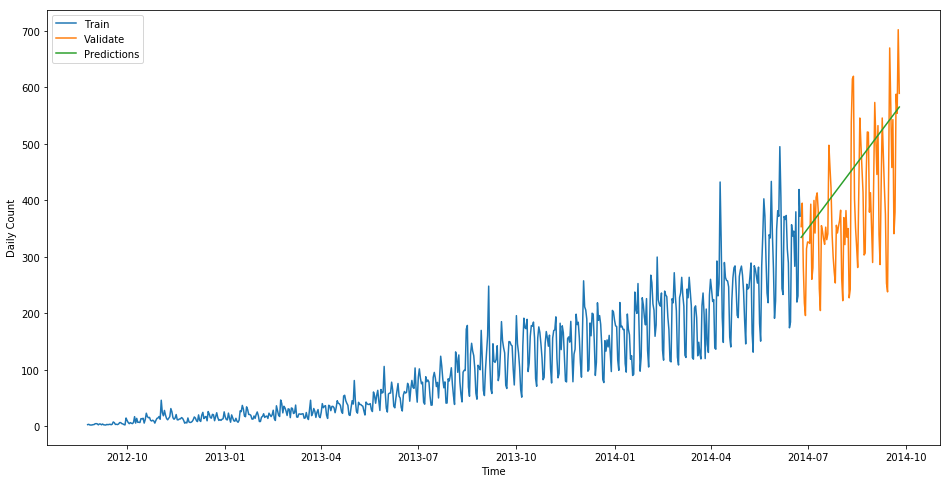

In [175]:
plt.figure(figsize = (16,8))
plt.plot(Train["Count"],label = "Train")
plt.plot(valid["Count"],label = "Validate")
plt.plot(y_hat_avg["Holt_Predictions"],label = "Predictions")
plt.xlabel("Time")
plt.ylabel("Daily Count")
plt.legend(loc = "best")

In [176]:
rmse_holt_linear = sqrt(mean_squared_error(valid["Count"],y_hat_avg["Holt_Predictions"]))
rmse_holt_linear
#A Slighty Better Model

112.94278345314041

In [177]:
#Building Holt Winters Model 
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()

In [178]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))

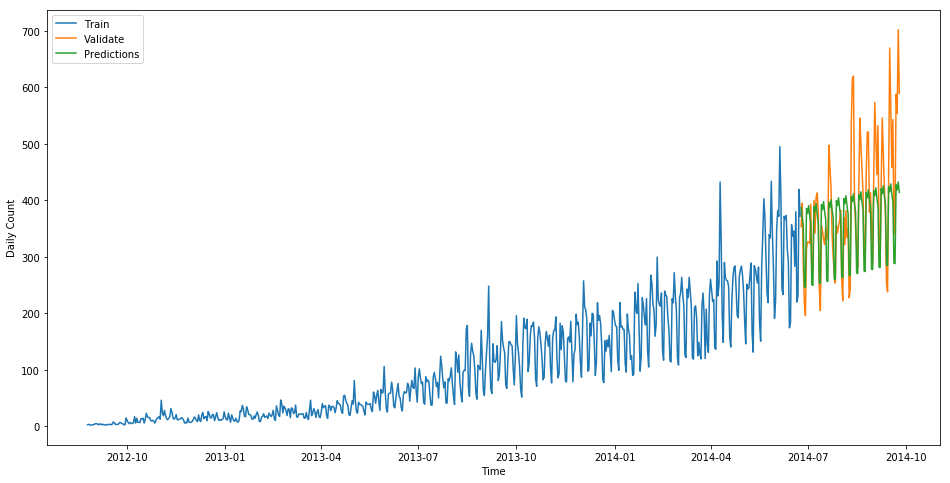

In [179]:
plt.figure(figsize = (16,8))
plt.plot(Train["Count"],label = "Train")
plt.plot(valid["Count"],label = "Validate")
plt.plot(y_hat_avg["Holt_Winter"],label = "Predictions")
plt.xlabel("Time")
plt.ylabel("Daily Count")
plt.legend(loc = "best")

In [180]:
rmse_winter = sqrt(mean_squared_error(valid["Count"],y_hat_avg["Holt_Winter"]))
rmse_winter

82.37527095912128

In [181]:
#Applying the ARIMA Modelling
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(window = 24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [182]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

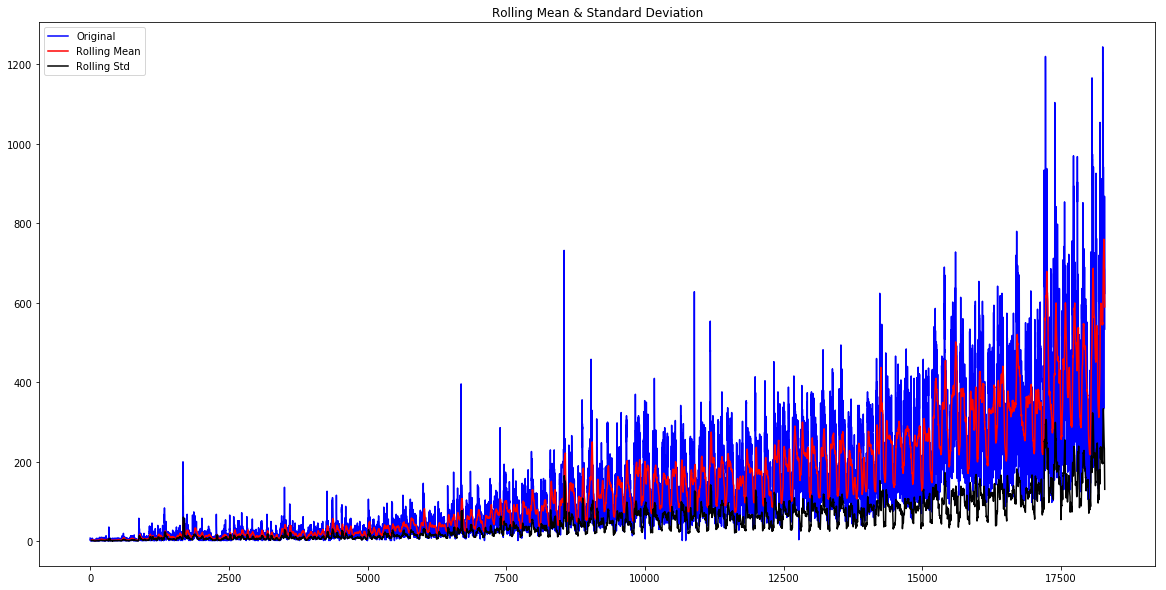

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [183]:
test_stationarity(train_original['Count'])

In [184]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

In [185]:
Train.head()

,Year,Month,Day,Hour,Count
Datetime,,,,,
2012-08-25,2012.0,8.0,25.0,11.5,3.166667
2012-08-26,2012.0,8.0,26.0,11.5,3.666667
2012-08-27,2012.0,8.0,27.0,11.5,2.583333
2012-08-28,2012.0,8.0,28.0,11.5,2.416667
2012-08-29,2012.0,8.0,29.0,11.5,2.500000


In [186]:
#Making The Moving Average Curve for our Train Set
moving_avg = Train_log.rolling(window = 24).mean()


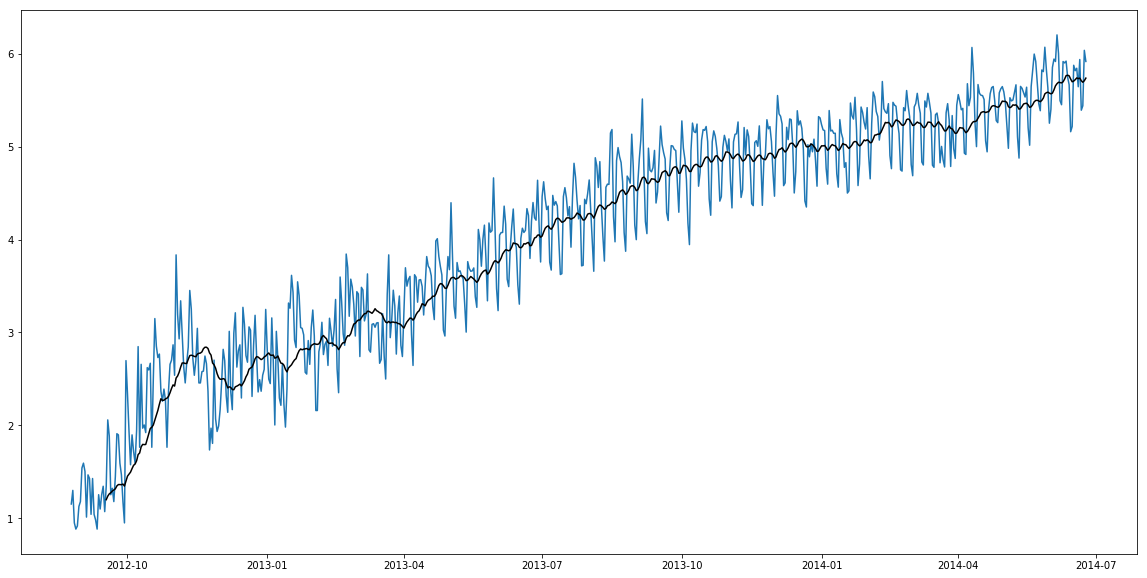

In [187]:
plt.plot(Train_log)
plt.plot(moving_avg, color = 'black')
plt.show()

In [188]:
train_log_moving_avg_diff = Train_log - moving_avg

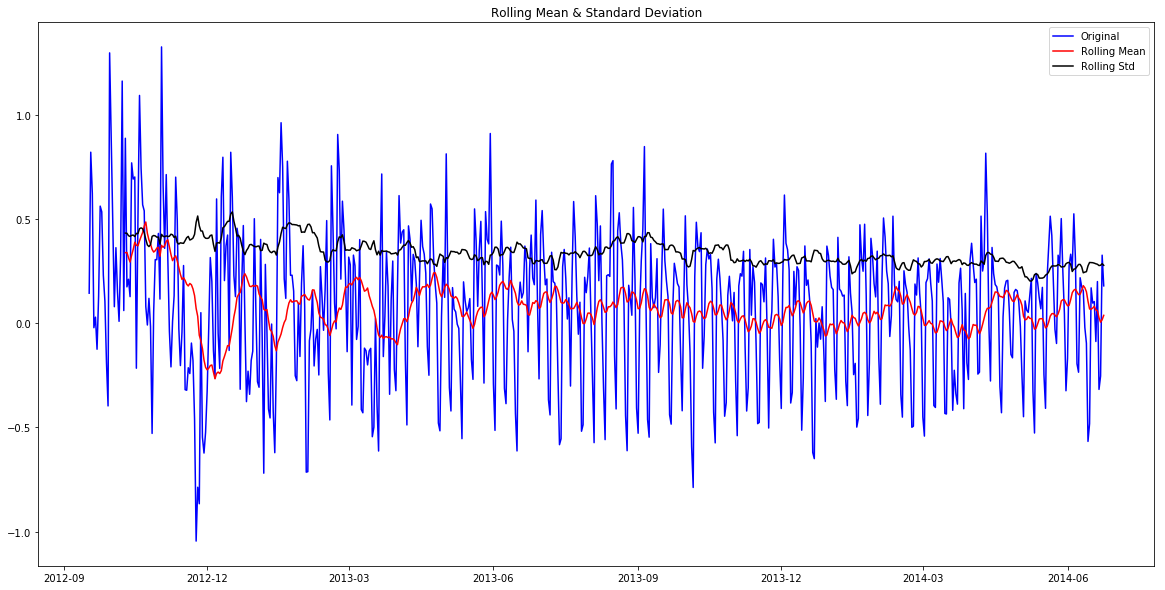

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [189]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

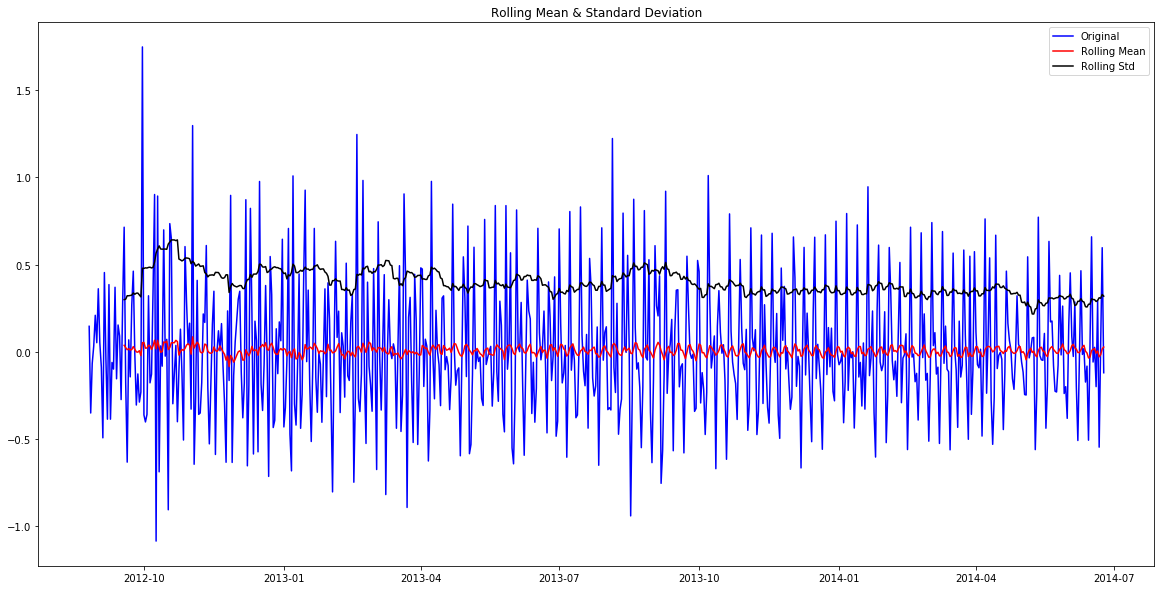

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [190]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

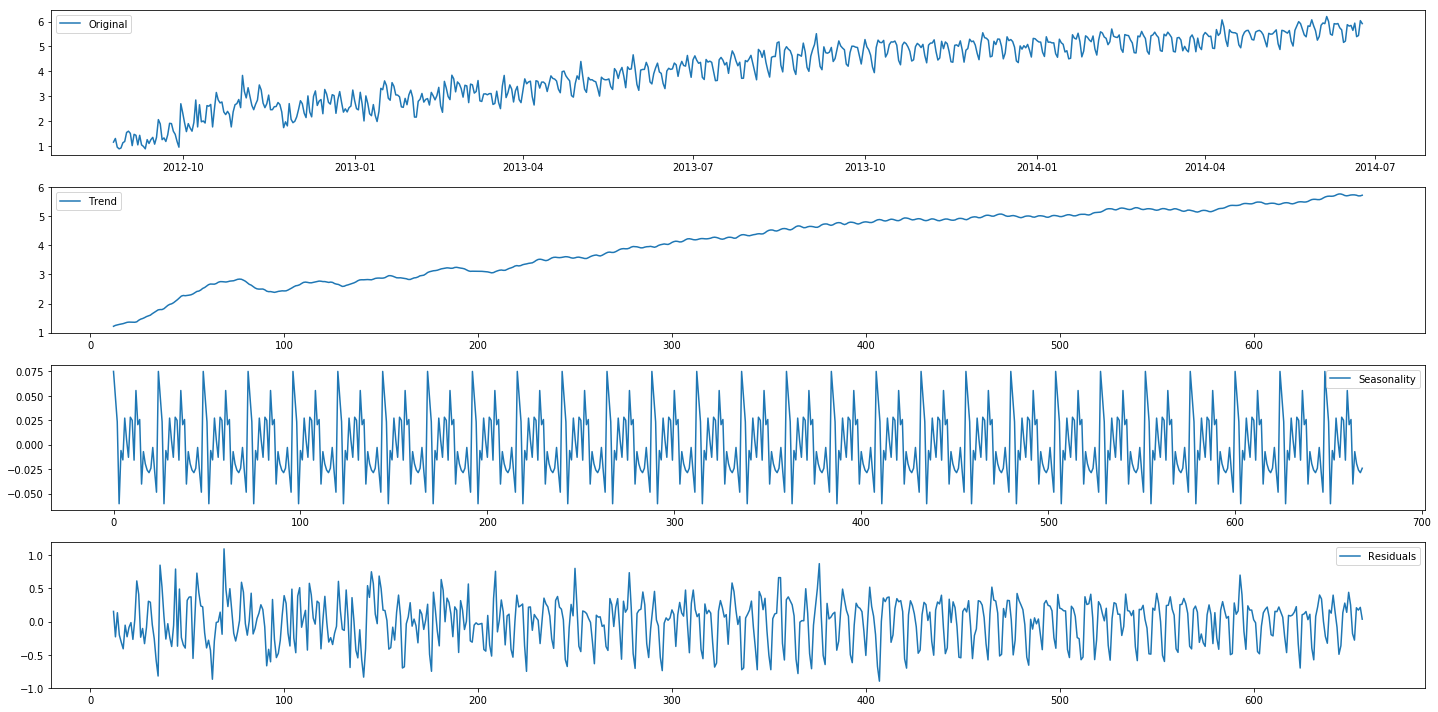

In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

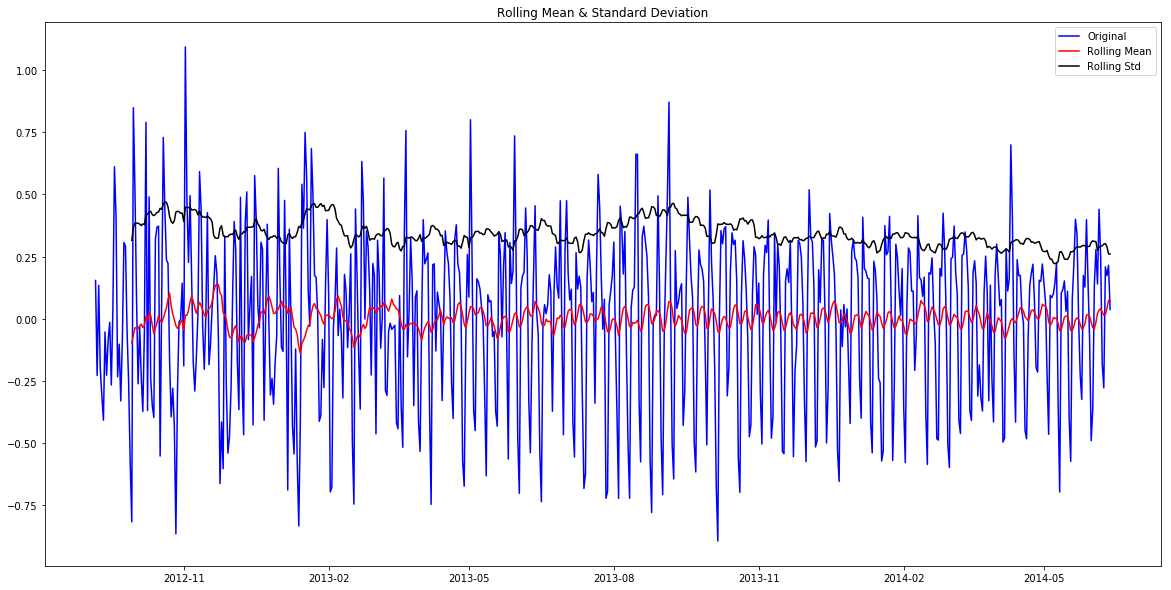

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [192]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

In [193]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

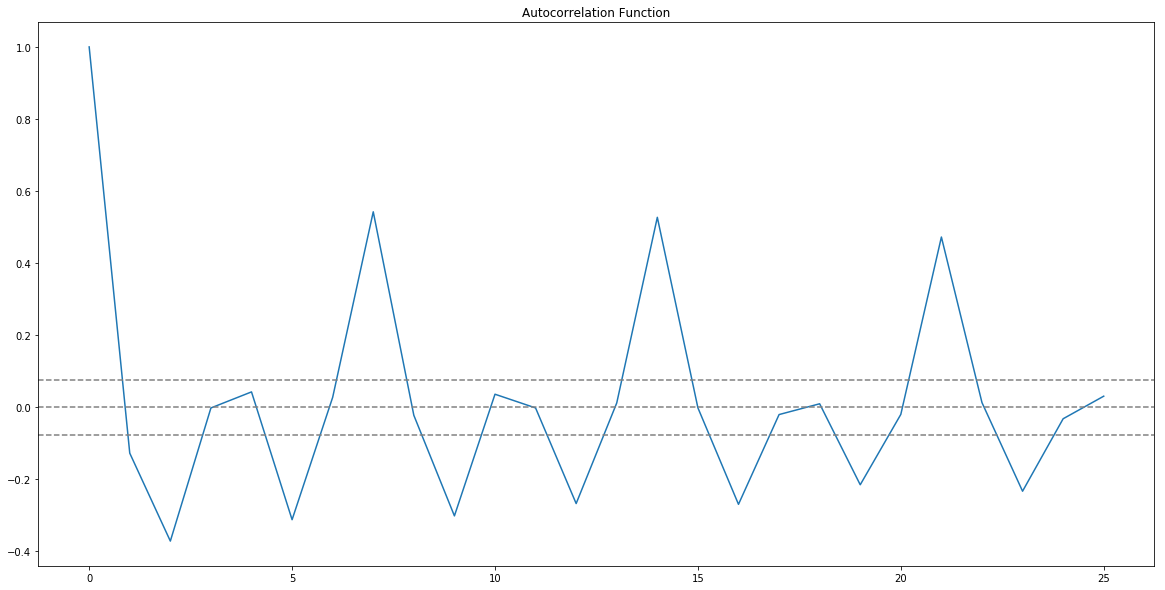

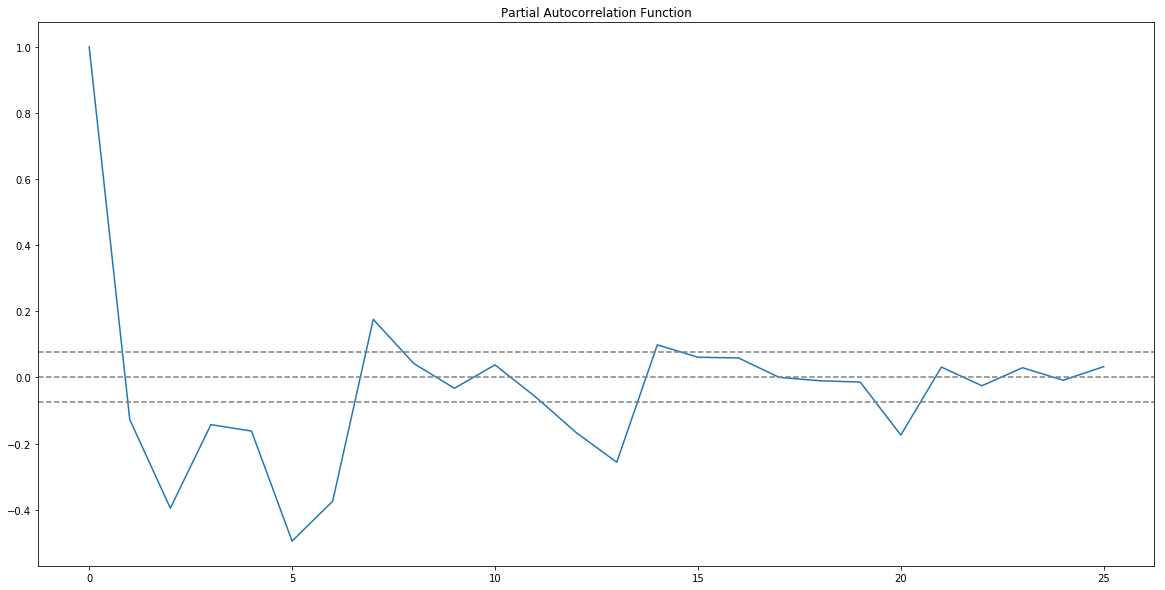

In [194]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [195]:
from statsmodels.tsa.arima_model import ARIMA

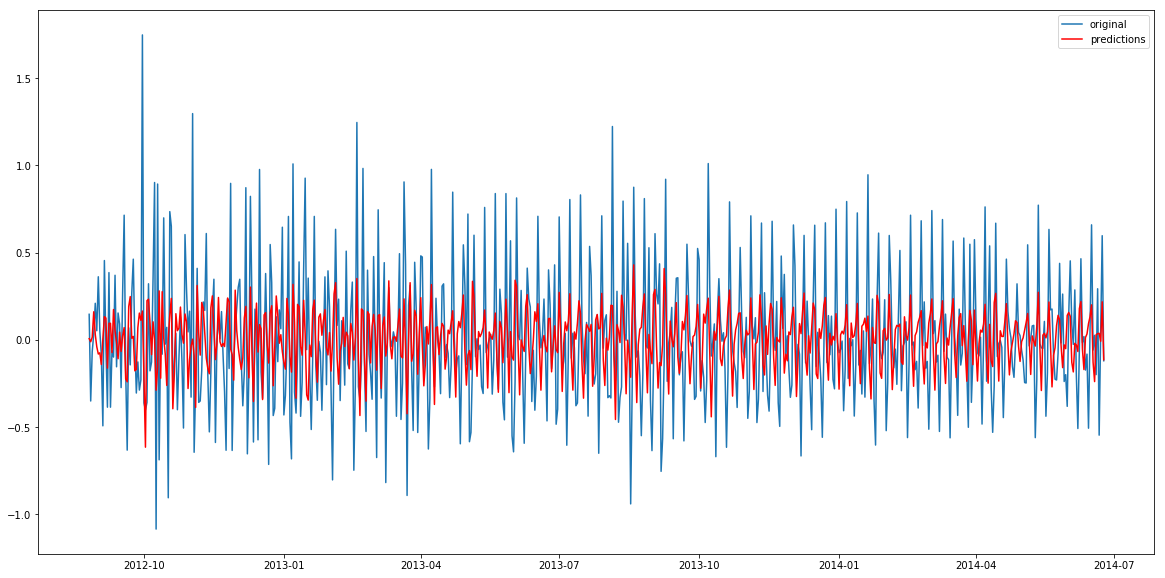

In [196]:
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [197]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict.head(10)

2014-06-25    0.000000
2014-06-26   -0.203497
2014-06-27   -0.109158
2014-06-28   -0.034477
2014-06-29   -0.073894
2014-06-30   -0.085319
2014-07-01   -0.056662
2014-07-02   -0.046163
2014-07-03   -0.048269
2014-07-04   -0.040971
Freq: D, dtype: float64

In [198]:
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1.head()

Datetime
2014-06-25    5.868355
2014-06-26    5.868355
2014-06-27    5.868355
2014-06-28    5.868355
2014-06-29    5.868355
Freq: D, dtype: float64

In [199]:
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

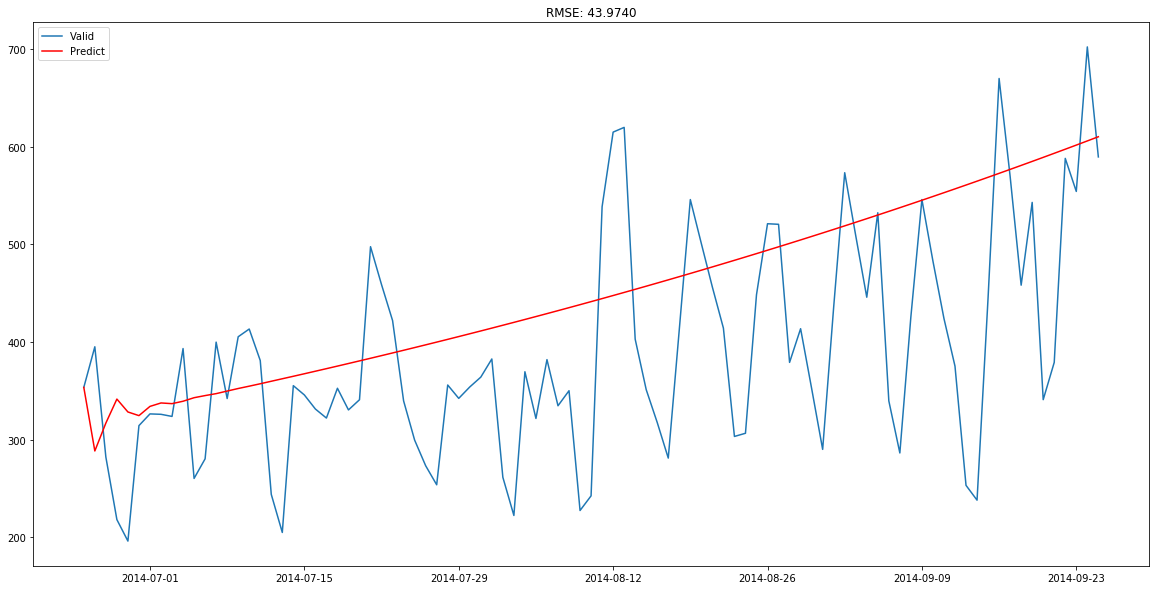

In [200]:
plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

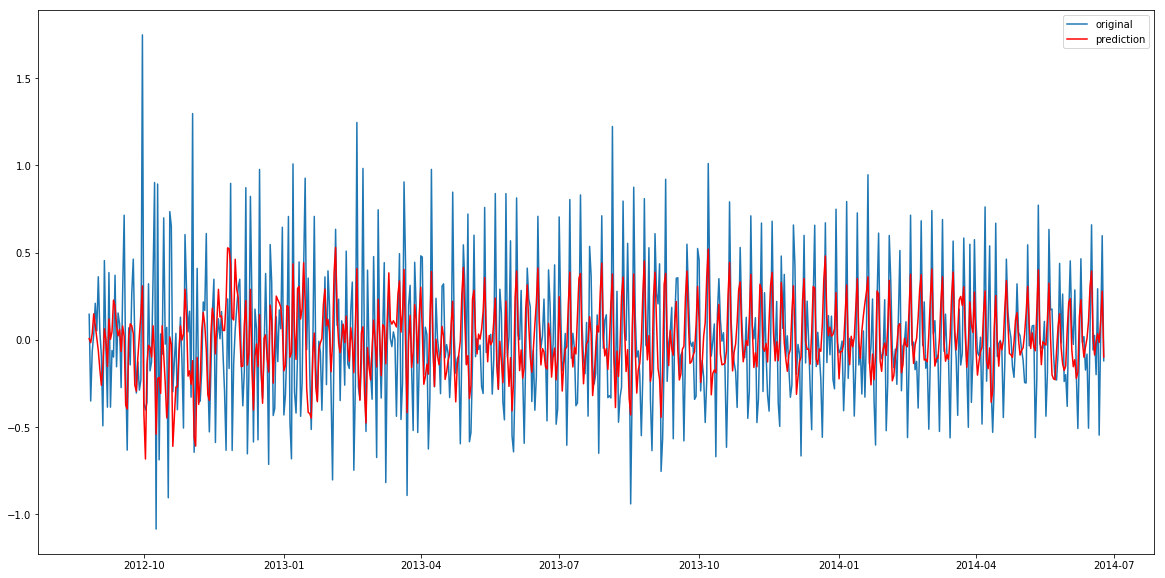

In [201]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [202]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

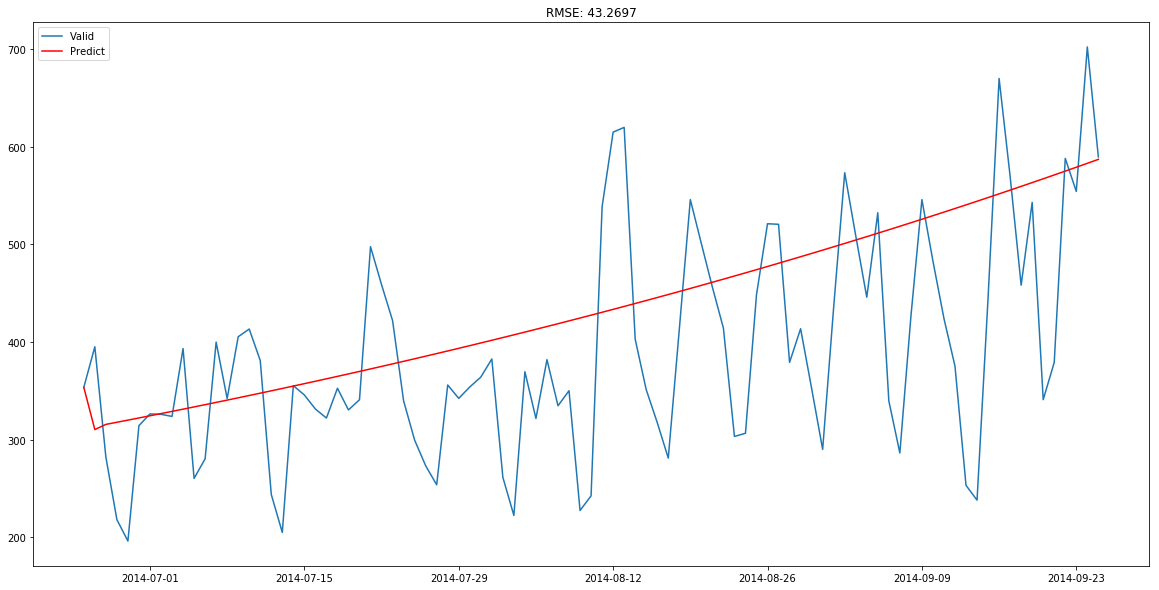

In [203]:
plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

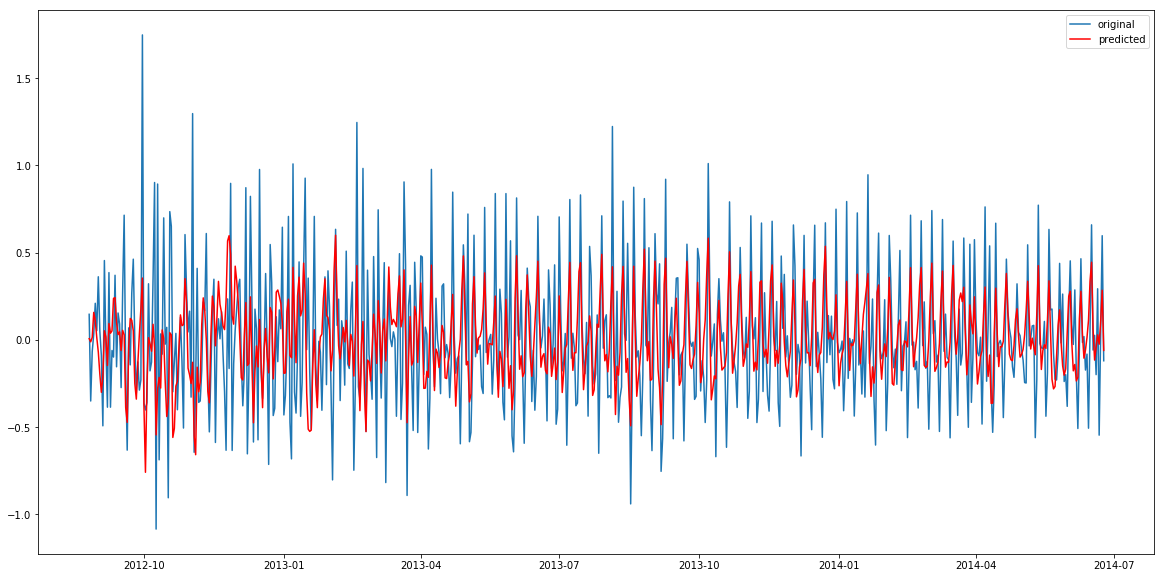

In [204]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [205]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [206]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [207]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

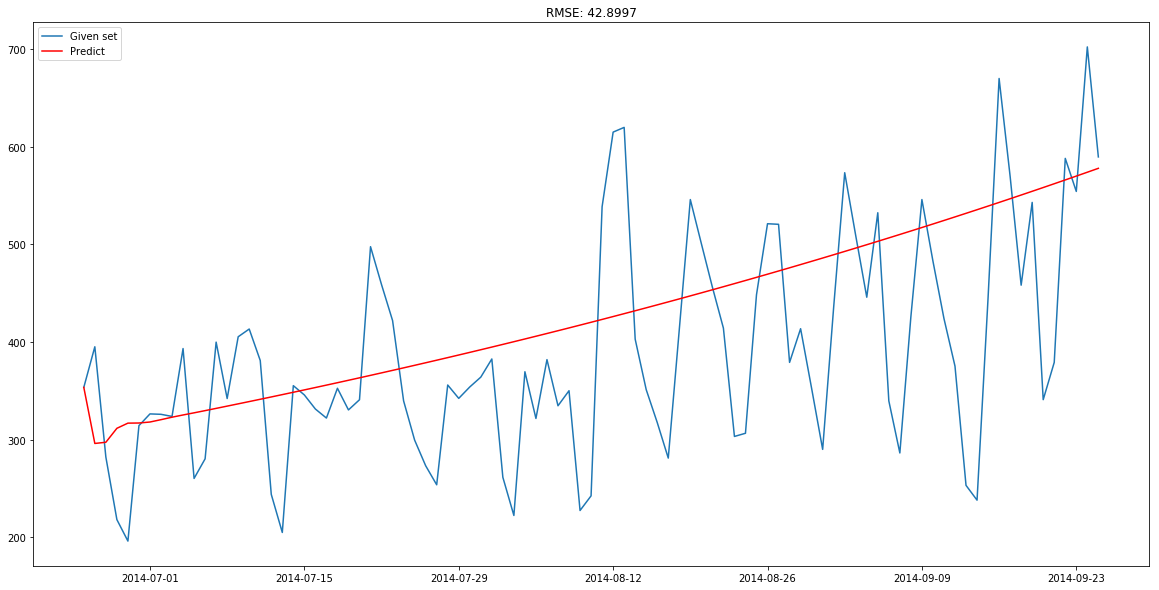

In [208]:
check_prediction_diff(ARIMA_predict_diff, valid)

In [209]:
predict_diff= ARIMA_predict_diff.cumsum().shift().fillna(0)
predict_base = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
predict_log = predict_base.add(predict_diff,fill_value=0)
predictions_final_ARIMA = np.exp(predict_log)

In [210]:
predictions_final_ARIMA = pd.DataFrame(predictions_final_ARIMA)
predictions_final_ARIMA.head()

,0
Datetime,
2014-06-25,353.666667
2014-06-26,296.234587
2014-06-27,297.461235
2014-06-28,311.750401
2014-06-29,317.046592


In [211]:
#RMSE OF ARIMA Model
rmse_arima = sqrt(mean_squared_error(valid["Count"],predictions_final_ARIMA[0]))
rmse_arima

103.86967466159962

In [212]:
#Developing a SARIMA Model
import statsmodels.api as sm

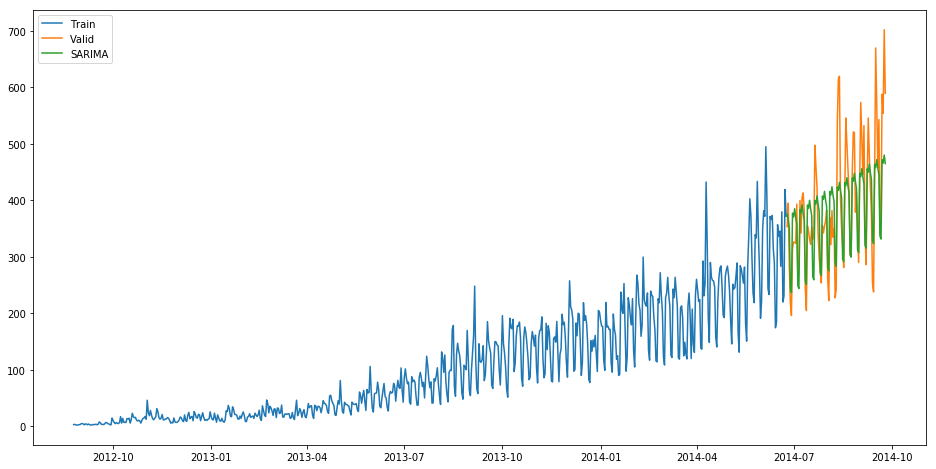

In [213]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [214]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

69.96847192224952


In [215]:
fit_final = sm.tsa.statespace.SARIMAX(train["Count"], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()

In [216]:
predict=fit_final.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

In [217]:
test['prediction']=predict

In [242]:
# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()


In [243]:
# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

In [244]:
temp2=pd.read_csv("GROUPby.csv")

In [245]:
temp2.head()

,Hour,Hour.1,ratio
0,0,NaN,0.044287
1,1,NaN,0.035343
2,2,NaN,0.029911
3,3,NaN,0.024714
4,4,NaN,0.020802


In [246]:
temp2=temp2.drop('Hour.1',1)

In [247]:
test.count()

ID            213
year          213
month         213
day           213
Hour          213
prediction    213
dtype: int64

In [248]:
test_original.count()

ID          5112
Datetime    5112
year        5112
month       5112
day         5112
Hour        5112
dtype: int64

In [249]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

In [250]:
merge.head(30)

,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,525.850309,18288,0
1,18299.5,26.0,525.850309,18289,1
2,18299.5,26.0,525.850309,18290,2
3,18299.5,26.0,525.850309,18291,3
4,18299.5,26.0,525.850309,18292,4
5,18299.5,26.0,525.850309,18293,5
6,18299.5,26.0,525.850309,18294,6
7,18299.5,26.0,525.850309,18295,7
8,18299.5,26.0,525.850309,18296,8
9,18299.5,26.0,525.850309,18297,9


In [251]:
# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

In [252]:
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,525.850309,18288,0,0.044287
1,18299.5,26.0,525.850309,18289,1,0.035343
2,18299.5,26.0,525.850309,18290,2,0.029911
3,18299.5,26.0,525.850309,18291,3,0.024714
4,18299.5,26.0,525.850309,18292,4,0.020802


In [253]:
# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [254]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')